## Step 10: Predict cell type annotations with CellTypist model for Wheeler et al scRNA-seq data

In Step 9, we created a [CellTypist (PMID: 35549406)](https://pubmed.ncbi.nlm.nih.gov/35549406/) model using the Allen Brain Cell atlas ([Yao et al 2023, PMID: 38092916](https://pubmed.ncbi.nlm.nih.gov/38092916/)) for the purpose of generating automated cell type annotations of cells in the Wheeler et al mouse single-cell RNA-seq dataset. In this step, we'll use our trained model to predict cell type annotations for each single cell in the Wheeler dataset.

In [1]:
import os
os.chdir('..') # changing working directory to parent 'EpiMemAstros' directory, adjust as needed
from pathlib import Path
import anndata as ad
import scanpy as sc
import pandas as pd
import numpy as np
import celltypist
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Arial'
sc.set_figure_params(dpi = 600, dpi_save = 600, vector_friendly = False, format = 'svg')

First we'll load the trained model:

In [2]:
model = celltypist.models.Model.load(model = 'outputs/celltypist_ABC_model.pkl')

Next, we'll use the CSV count matrix we produced for the Wheeler et al dataset (from Step 8) as input and run the annotation step using our trained model.

In [3]:
predictions = celltypist.annotate("outputs/mouse_count_matrix.csv", model = model, majority_voting = True, transpose_input = True)
predictions

📁 Input file is 'outputs/mouse_count_matrix.csv'
⏳ Loading data
🔬 Input data has 24963 cells and 30317 genes
🔗 Matching reference genes in the model
🧬 21375 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
/Users/liddelowlab/mambaforge/envs/EpiMemAstros/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
⛓️ Over-clustering input data with resolution set to 15
🗳️ Majority voting the predictions
✅ Majority voting done!


CellTypist prediction result for 24963 query cells
    predicted_labels: data frame with 3 columns ('predicted_labels', 'over_clustering', 'majority_voting')
    decision_matrix: data frame with 24963 query cells and 23 cell types
    probability_matrix: data frame with 24963 query cells and 23 cell types
    adata: AnnData object referred

We'll save the cell type predictions for each single cell to a CSV file.

In [4]:
predictions.predicted_labels.to_csv('outputs/celltypist_predictions.csv')

Lastly, we'll check how the CellTypist cell type annotation predictions compare to the clusters defined by Lee et al.

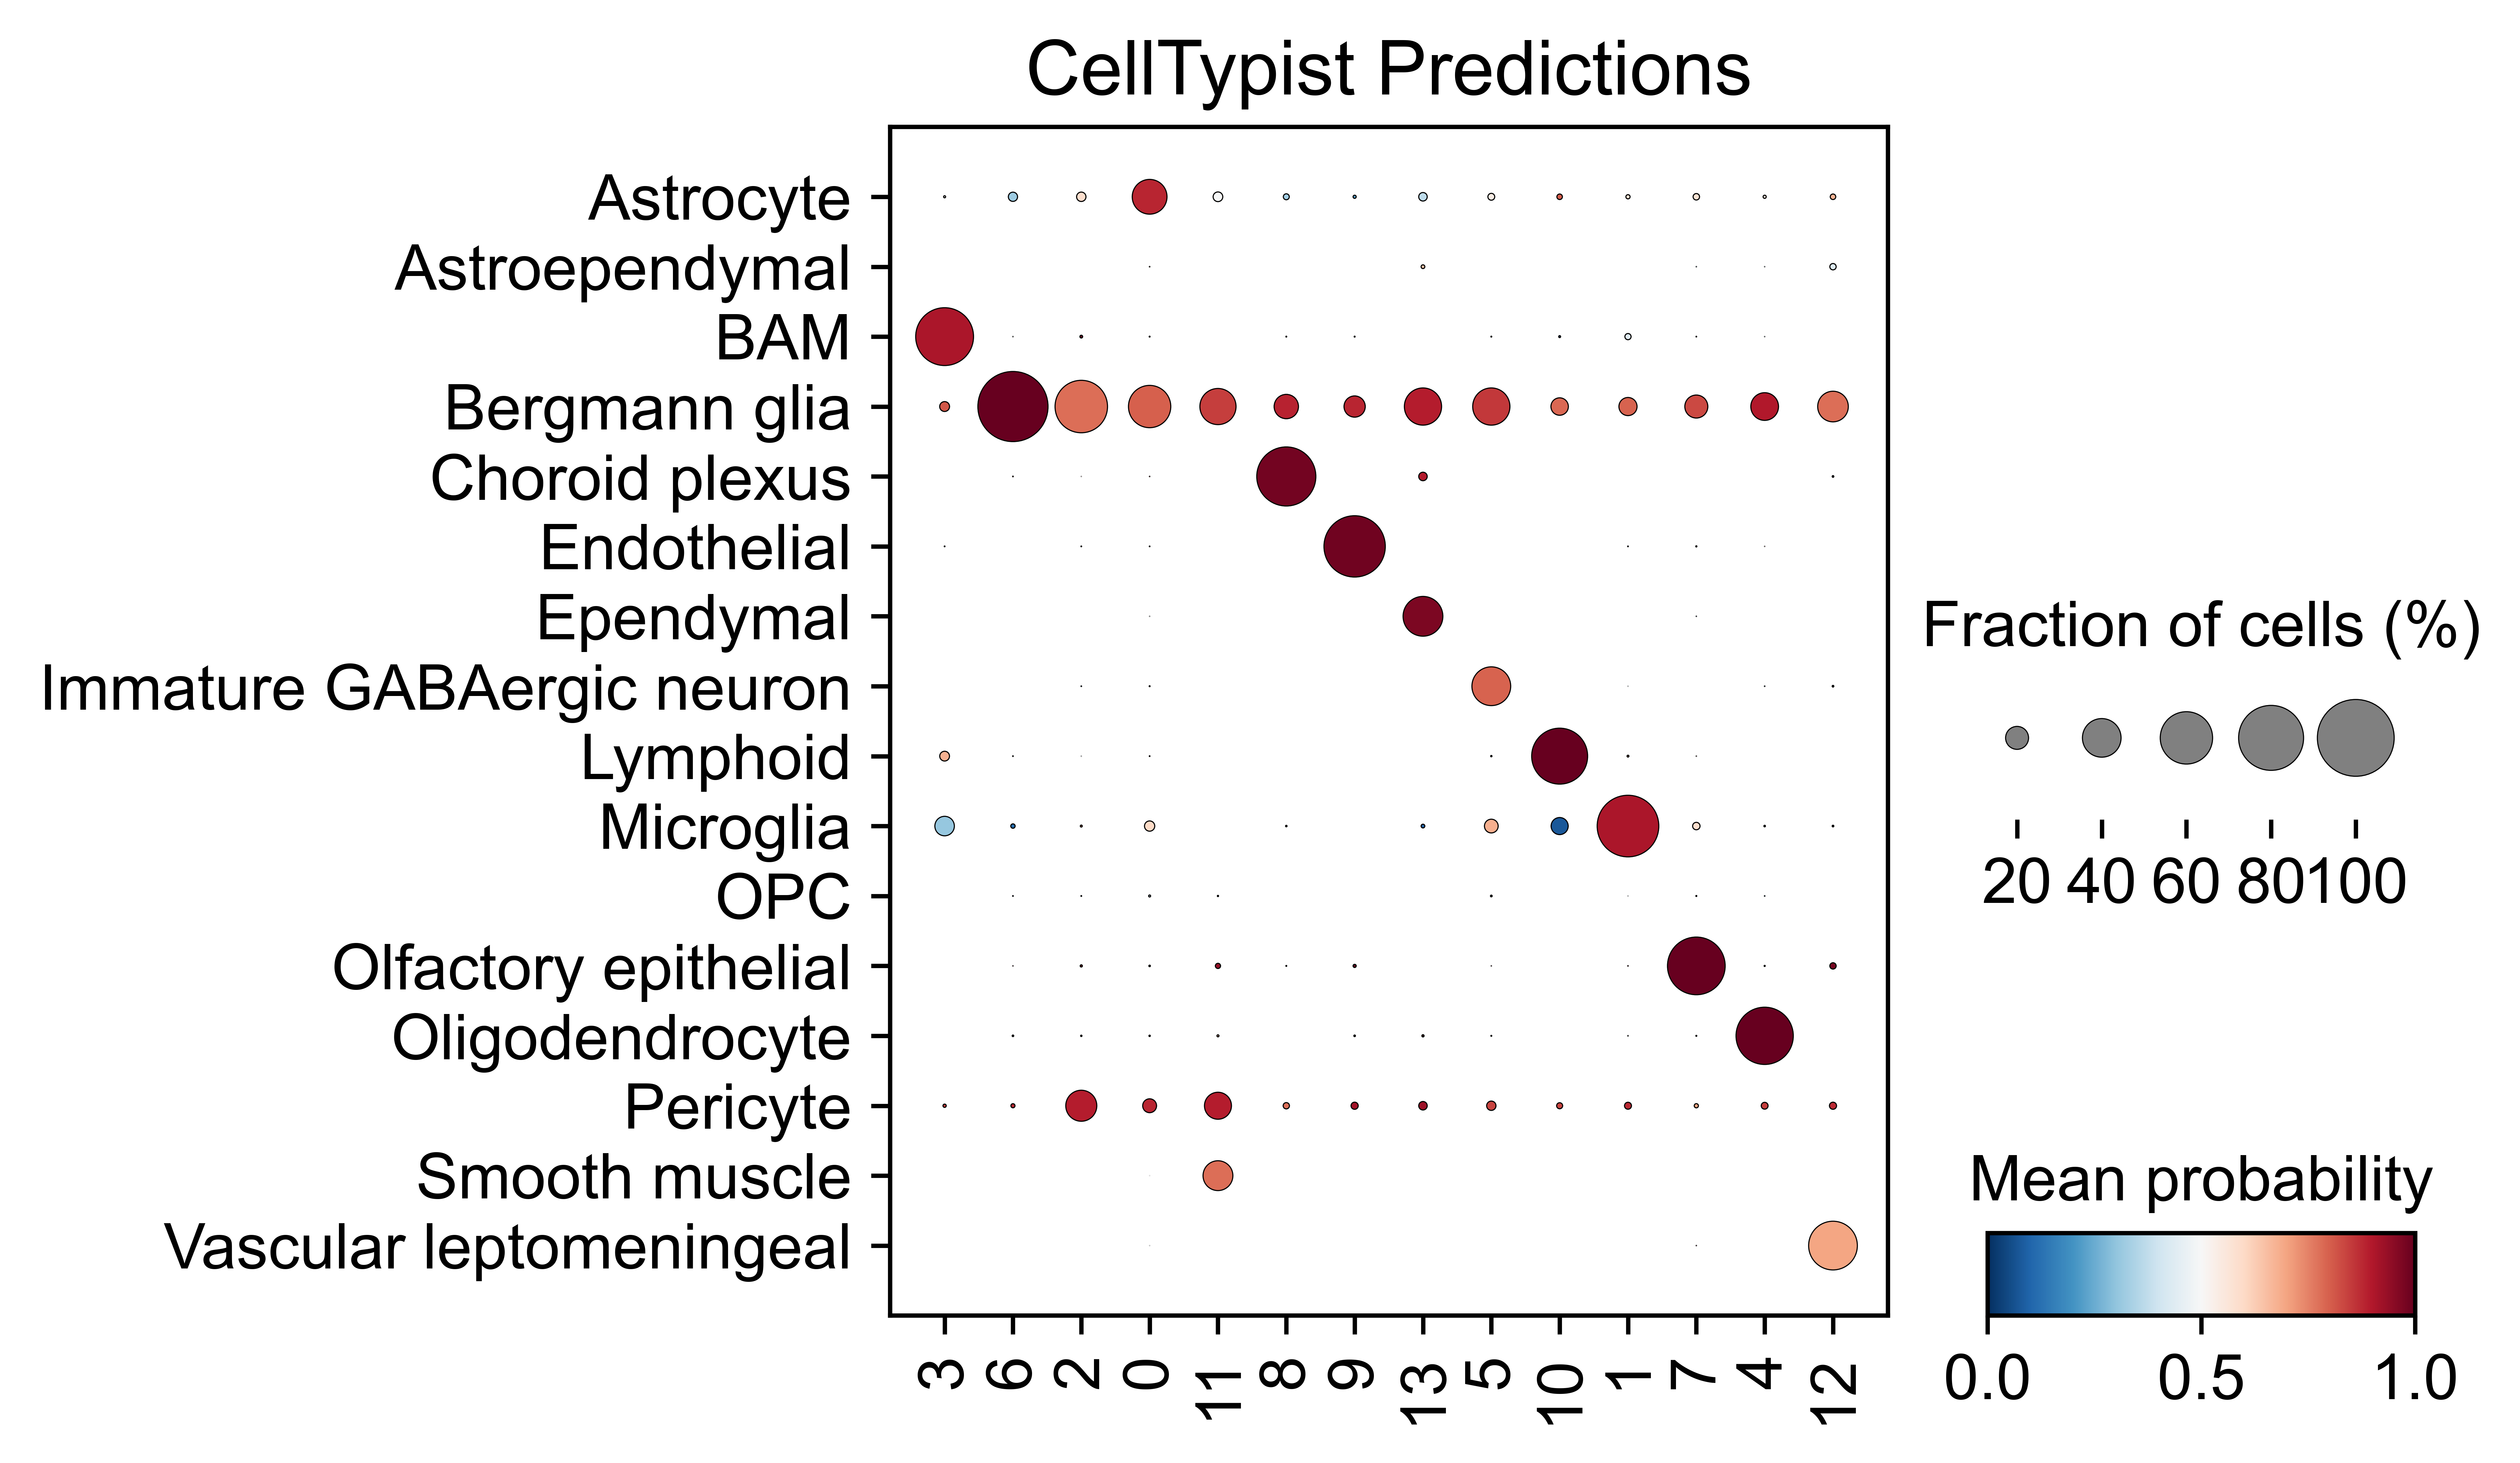

In [5]:
cluster_labels = pd.read_csv('outputs/wheeler_cluster_labels.txt', header = None)
cluster_labels = cluster_labels[0].values

with plt.rc_context({"figure.figsize": (5, 4), "figure.dpi":600}):
    celltypist.dotplot(predictions, use_as_reference = cluster_labels, use_as_prediction = 'majority_voting',
                       var_group_rotation = 0,
                      figsize=(5,4), title = 'CellTypist Predictions', show = False)

    fig = plt.gcf()
    cbar_ax = fig.axes[-1]
    cbar_ax.grid(False)    
    
    plt.savefig('outputs/figures/figure3e.svg', format='svg', bbox_inches ='tight')
    plt.show()